In [1]:
# Estudos sobre medidas de centralidade e normalidade de dados em distribuições contínuas.

In [4]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt


In [14]:
dataset = pd.read_csv("jobs_in_data.csv", sep=",")
print(dataset.shape)
dataset.head()

(9355, 12)


,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [52]:
data_scientist = dataset[dataset['job_title'] == 'Data Scientist']
print(data_scientist.shape)
print(data_scientist.head())

(1989, 12)
    work_year       job_title               job_category salary_currency  \
3        2023  Data Scientist  Data Science and Research             USD   
4        2023  Data Scientist  Data Science and Research             USD   
5        2023  Data Scientist  Data Science and Research             USD   
6        2023  Data Scientist  Data Science and Research             USD   
13       2023  Data Scientist  Data Science and Research             GBP   

    salary  salary_in_usd employee_residence experience_level employment_type  \
3   212000         212000      United States           Senior       Full-time   
4    93300          93300      United States           Senior       Full-time   
5   130000         130000      United States           Senior       Full-time   
6   100000         100000      United States           Senior       Full-time   
13   35000          43064     United Kingdom        Mid-level       Full-time   

   work_setting company_location company_size

In [53]:
# Calculando as medidas de centralidade e de dispersão dos salários em euros dos Cientistas de Dados.
salarios = data_scientist['salary_in_usd']
media = np.mean(salarios)
median = np.median(salarios)
quartis = np.quantile(salarios, [0, 0.25, 0.5, 0.75, 1])
desvio_padrao = np.std(salarios, ddof = 1)
variancia = np.var(salarios, ddof = 1)
# print(salarios)
print(f"Média: {media:.2f}")
print(f"Mediana: {median:.2f}")
print(f"Quartis: {quartis}")
print(f"Desvio-Padrão: {desvio_padrao:.2f}")
print(f"Variância: {variancia:.2f}")


Média: 156681.02
Mediana: 154800.00
Quartis: [ 16000. 120000. 154800. 190000. 412000.]
Desvio-Padrão: 59914.37
Variância: 3589732027.19


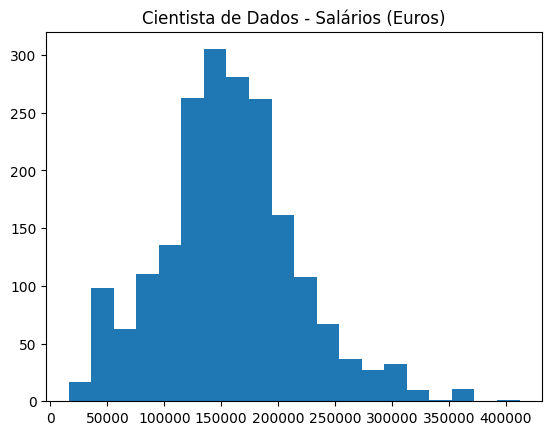

In [56]:
# Teste de Normalidade
# Histograma
plt.hist(salarios, bins = 20)
plt.title("Cientista de Dados - Salários (Euros)")
plt.show()

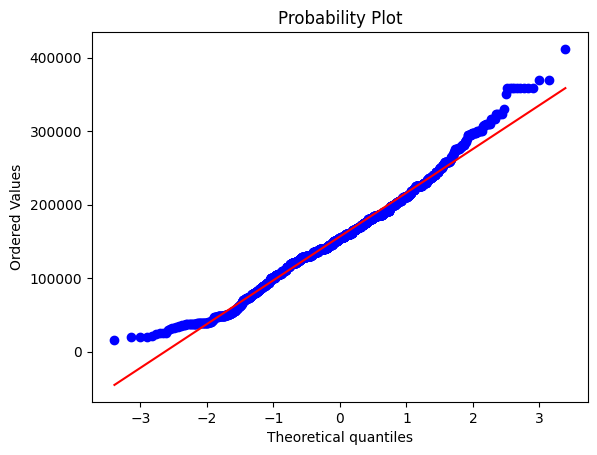

In [57]:
# Teste de Normalidade
# Geração de gráfico para verificar se a distribuição é normal
fig, ax = plt.subplots()
stats.probplot(salarios, fit=True,   plot=ax)
plt.show()

In [58]:
# Teste de Normailidade
# Execução do Teste de Shapiro-Wilk
# Segundo argumento é o valor de p, não há como rejeitar a hipótese nula
stats.shapiro(salarios)

ShapiroResult(statistic=np.float64(0.985642210047207), pvalue=np.float64(3.0766078944204203e-13))

In [ ]:
# A constatação, pelo teste de Shapiro-Wilk, na análise dos dados num gráfico de historgrama e do Gráfico Q-Q plot, verifica que a distribuição de salário de homens e mulheres cientista de dados não estão normalmente distribuídos. O que se percebe uma discrepância nos pontos extremos da distribuição. Isso, se deve em parte, aos níveis de experiência profissional dos trabalhadores.